In [3]:
# Cell 1: The Universal Setup (Run Once)
import random
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# --- Class Definitions ---
# Human class is unchanged
class Human:
    def __init__(self, soul_id, generation=0):
        self.soul_id = soul_id; self.generation = generation; self.is_alive = True
        self.age = 0; self.lifespan = random.randint(50, 90); self.varna = None
        self.karma_score = 0
    def __repr__(self):
        display_varna = self.varna if self.varna is not None else "No Varna"
        return (f"[Soul:{self.soul_id:03d} | Gen:{self.generation:02d} | Varna:{display_varna:<10} | Karma:{self.karma_score:4d}]")

# World class is now more flexible for experiments
class World:
    def __init__(self, karma_rules, reincarnation_thresholds, population_cap=1000):
        self.year = 0; self.population = []; self.soul_counter = 0; self.history = []
        self.population_cap = population_cap
        # --- NEW: Rules of the universe are now parameters ---
        self.karma_rules = karma_rules
        self.reincarnation_thresholds = reincarnation_thresholds
        
    def create_first_generation(self, num_humans):
        for _ in range(num_humans):
            new_human = Human(soul_id=self.soul_counter+1, generation=0)
            self.soul_counter += 1
            new_human.varna = 'Vaishya' # Start all equal for a controlled experiment
            if len(self.population) < self.population_cap: self.population.append(new_human)
            else: break

    def reincarnate(self, dead_human):
        if len(self.population) >= self.population_cap: return
        new_human = Human(soul_id=dead_human.soul_id, generation=dead_human.generation + 1)
        karma = dead_human.karma_score
        # Use the thresholds passed in during creation
        t = self.reincarnation_thresholds
        if karma > t['brahmana']: new_human.varna = "Brahmana"
        elif karma > t['kshatriya']: new_human.varna = "Kshatriya"
        elif karma >= t['vaishya']: new_human.varna = "Vaishya"
        else: new_human.varna = "Shudra"
        self.population.append(new_human)
        
    def live_one_year(self):
        self.year += 1
        for human in self.population[:]:
            if human.is_alive:
                human.age += 1
                # Use the karma rules passed in during creation
                rule = self.karma_rules.get(human.varna, (-3, 3)) # Default rule
                human.karma_score += random.randint(rule[0], rule[1])
                if human.age >= human.lifespan:
                    human.is_alive = False; self.population.remove(human); self.reincarnate(human)
        self.log_history()
        
    def log_history(self):
        # (This method is the same as before)
        if not self.population: return
        varnas = ["Brahmana", "Kshatriya", "Vaishya", "Shudra"]
        year_data = {'year': self.year, 'population': len(self.population)}
        for varna in varnas:
            count = len([p for p in self.population if p.varna == varna])
            avg_karma = sum(p.karma_score for p in self.population if p.varna == varna) / count if count > 0 else 0
            year_data[f'{varna}_count'] = count; year_data[f'{varna}_avg_karma'] = avg_karma
        self.history.append(year_data)

    def run_simulation(self, num_years):
        for i in range(num_years): self.live_one_year()

# --- Plotting Function ---
def plot_results(history_df, title):
    print("\n" + "="*50); print(f"      Results for: {title}"); print("="*50)
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Hypothesis Test: {title}', fontsize=20)
    ax1 = axes[0]; ax2 = axes[1]; varnas = ["Brahmana", "Kshatriya", "Vaishya", "Shudra"]
    ax1.stackplot(history_df['year'], history_df['Brahmana_count'], history_df['Kshatriya_count'], history_df['Vaishya_count'], history_df['Shudra_count'], labels=varnas, alpha=0.8)
    ax1.set_title('Population by Varna'); ax1.set_xlabel('Year'); ax1.set_ylabel('Population Count'); ax1.legend(loc='upper left')
    for varna in varnas: ax2.plot(history_df['year'], history_df[f'{varna}_avg_karma'], label=varna)
    ax2.set_title('Average Karma by Varna'); ax2.set_xlabel('Year'); ax2.set_ylabel('Average Karma Score'); ax2.legend(loc='upper left')
    plt.tight_layout(rect=[0, 0, 1, 0.95]); plt.show()

print("Experimental Simulation Engine is ready.")

Experimental Simulation Engine is ready.



      Results for: The 'Just Universe' (Null Hypothesis)


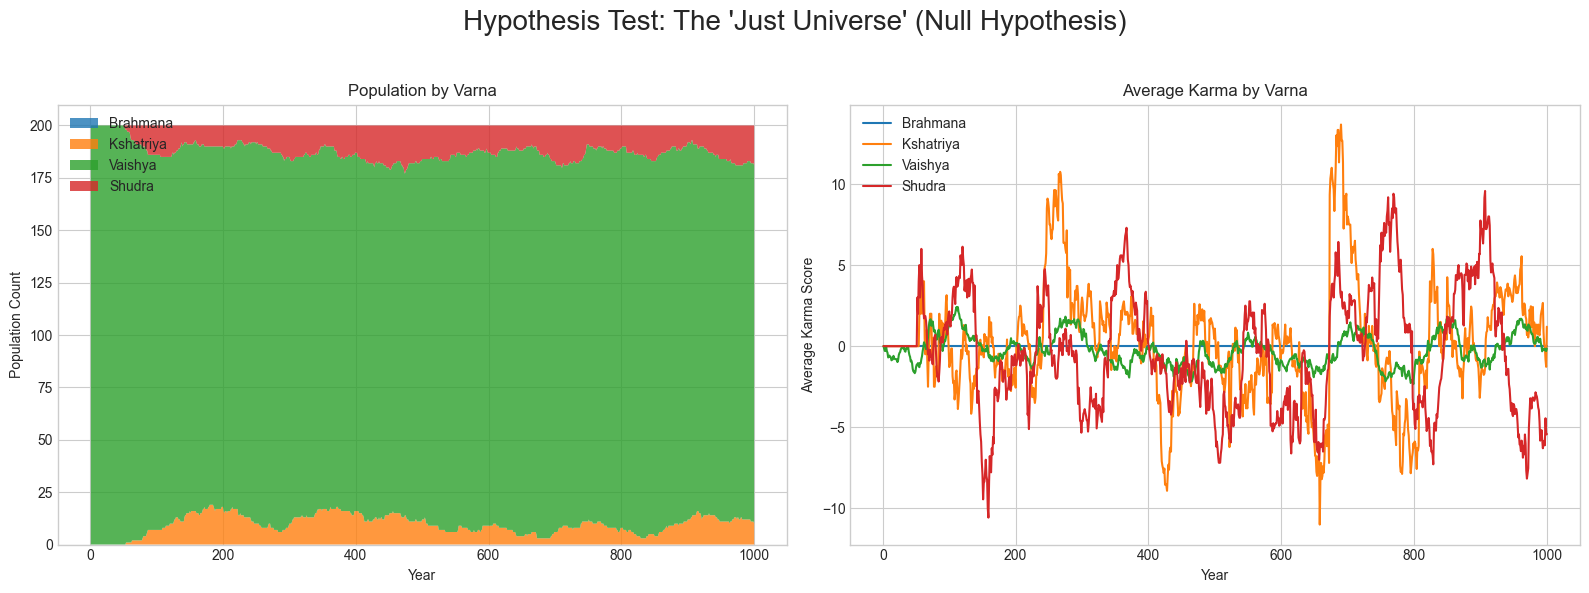

In [4]:
# The "Just Universe" Experiment

# --- Define the Fair Rules of this Universe ---
just_karma_rules = {
    "Brahmana": (-3, 3),
    "Kshatriya": (-3, 3),
    "Vaishya": (-3, 3),
    "Shudra": (-3, 3)
}
standard_thresholds = {
    'brahmana': 75,
    'kshatriya': 25,
    'vaishya': -25
}

# --- Run the simulation ---
just_world = World(karma_rules=just_karma_rules, reincarnation_thresholds=standard_thresholds)
just_world.create_first_generation(num_humans=200)
just_world.run_simulation(num_years=1000)

# --- Plot the results ---
history_df = pd.DataFrame(just_world.history)
plot_results(history_df, title="The 'Just Universe' (Null Hypothesis)")

Running Stress Test: Extreme Bias...

      Results for: Stress Test: Extreme Bias


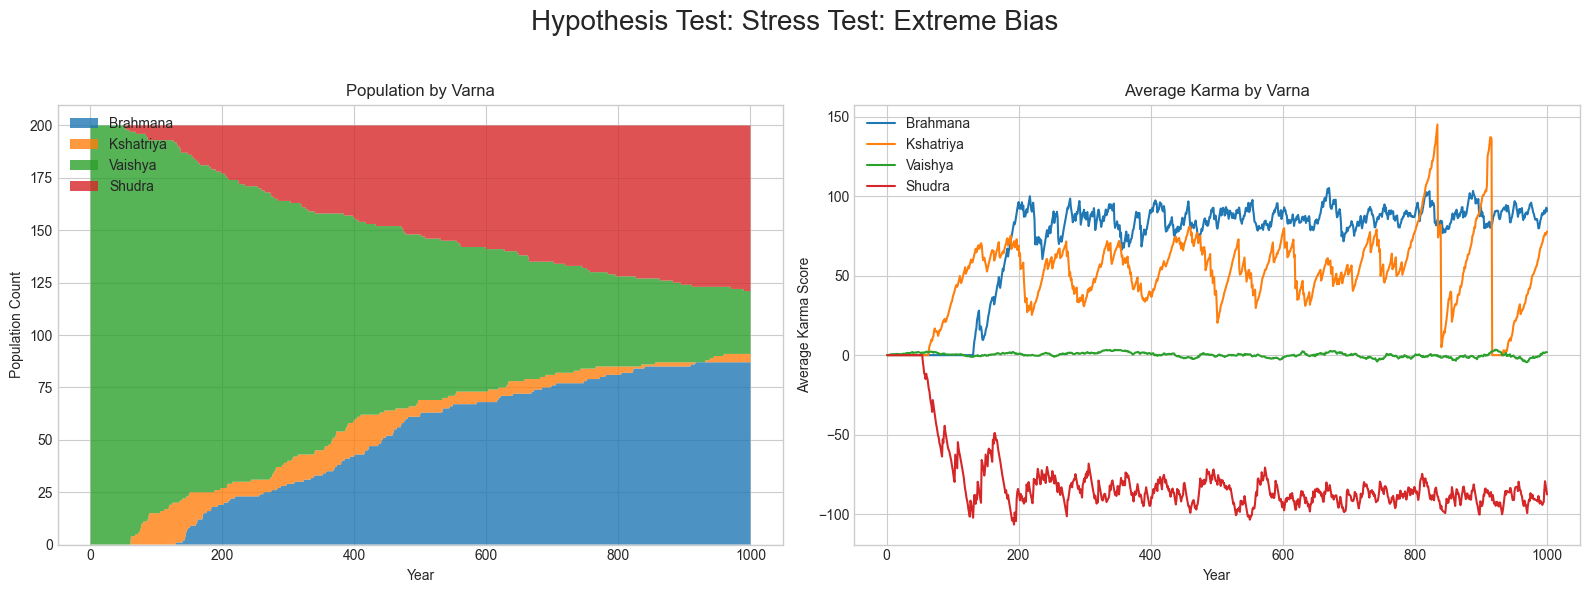

In [5]:
# Cell for Stress Test 2a: Extreme Bias

# --- Define the Extremely Biased Rules of this Universe ---
biased_karma_rules = {
    "Brahmana": (0, 5),    # Can only gain or maintain karma
    "Kshatriya": (-1, 4),  # Strong positive bias
    "Vaishya": (-3, 3),    # Balanced (for comparison)
    "Shudra": (-5, 0)     # Can only lose or maintain karma
}
standard_thresholds = {
    'brahmana': 75,
    'kshatriya': 25,
    'vaishya': -25
}

# --- Run the simulation ---
print("Running Stress Test: Extreme Bias...")
biased_world = World(karma_rules=biased_karma_rules, reincarnation_thresholds=standard_thresholds)
biased_world.create_first_generation(num_humans=200)
biased_world.run_simulation(num_years=1000)

# --- Plot the results ---
history_df = pd.DataFrame(biased_world.history)
plot_results(history_df, title="Stress Test: Extreme Bias")

Running Stress Test: Extreme Rigidity...

      Results for: Stress Test: Extreme Rigidity


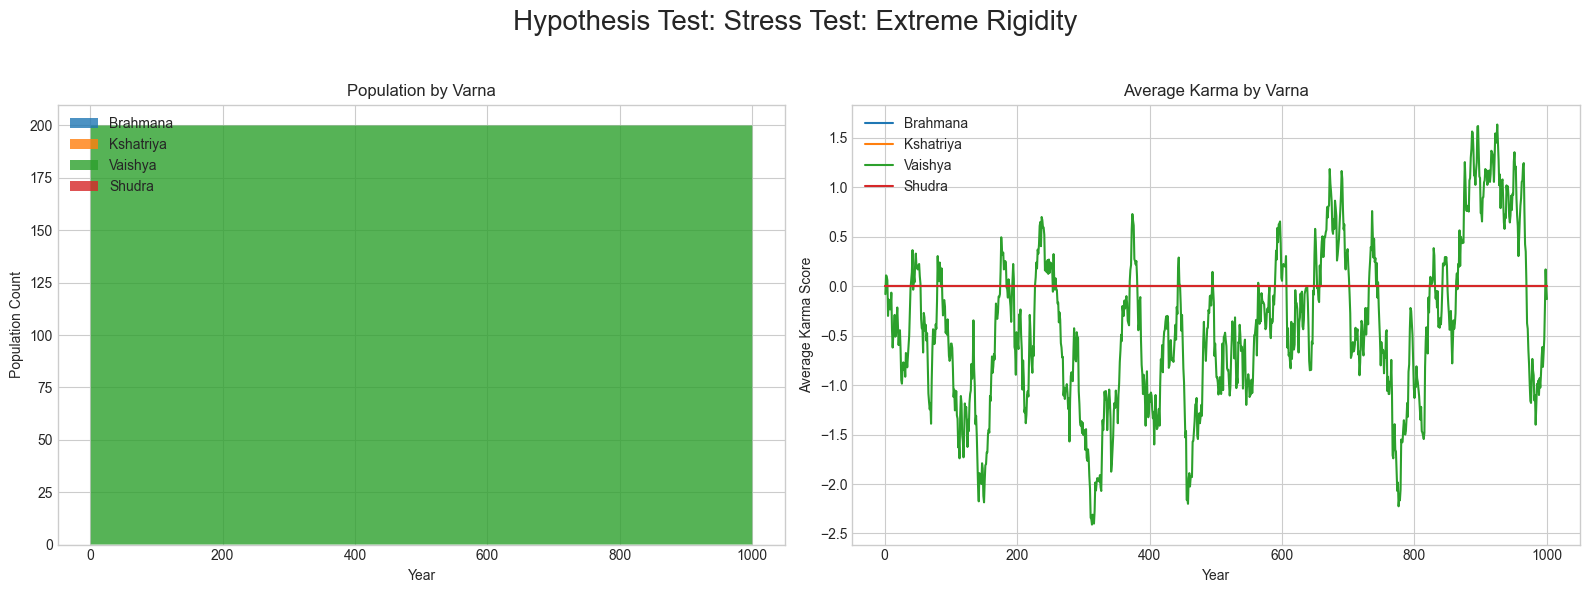

In [4]:
# Cell for Stress Test 2b: Extreme Rigidity

# --- Use our original biased rules ---
original_biased_rules = {
    "Brahmana": (-1, 5),
    "Kshatriya": (-2, 4),
    "Vaishya": (-3, 3),
    "Shudra": (-4, 2)
}
# --- But make the thresholds for changing Varna very high ---
rigid_thresholds = {
    'brahmana': 500,   # Requires an incredibly virtuous life
    'kshatriya': 200,
    'vaishya': -200
}

# --- Run the simulation ---
print("Running Stress Test: Extreme Rigidity...")
rigid_world = World(karma_rules=original_biased_rules, reincarnation_thresholds=rigid_thresholds)
rigid_world.create_first_generation(num_humans=200)
rigid_world.run_simulation(num_years=1000)

# --- Plot the results ---
history_df = pd.DataFrame(rigid_world.history)
plot_results(history_df, title="Stress Test: Extreme Rigidity")